## Import Libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

## Load Dataset

In [59]:
Iris=datasets.load_iris()
n=len(Iris.data[:,0])
x1=pd.DataFrame((Iris.data[:,:]),columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
x2=pd.DataFrame((np.ones((n))),columns=["Ones"])
x=[x2,x1,pd.DataFrame((Iris.target),columns=["Labels"])]
data=pd.concat(x,axis=1)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:5],data.iloc[:,5])

## Bivariate Linear Regression

In [60]:
def Bivariate_Linear_Regression(x,y):
    x_mean=np.sum(x)/len(x)
    y_mean=np.sum(y)/len(y)
    var_x=np.var(x)
    var_y=np.var(y)
    cov_xy=np.cov(x,y)
    w=cov_xy[0][1]/var_x
    b=np.subtract(y_mean,np.dot(w,x_mean))
    yl=[]
    for i in range(data.shape[0]):
        yl.append(b+(np.dot(w,X[i])))
    return yl

In [61]:
yl=Bivariate_Linear_Regression(data.iloc[:,3],data.iloc[:,4])

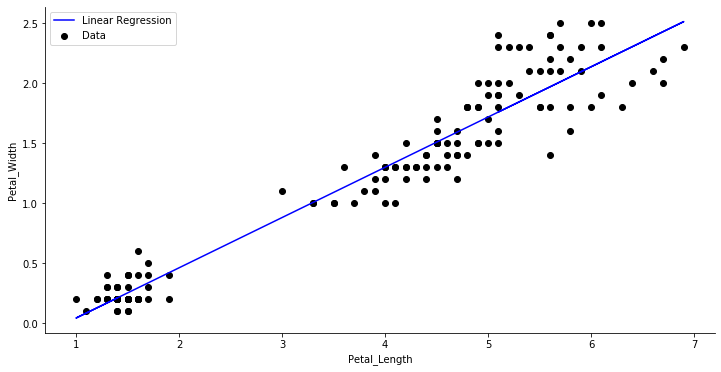

In [62]:
plt.figure(figsize=(12,6))
plt.scatter(x=X,y=Y,color='black',label='Data')
plt.plot(X,yl,color='blue',label='Linear Regression')
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Geometry of Linear Regression

In [71]:
Centered_x=np.subtract(X,x_mean)
Projy_1=np.dot(np.transpose(Y),np.ones((150)))/np.dot(np.transpose(np.ones((150))),np.ones((150)))
Projy_x=np.dot(np.transpose(Y),Centered_x)/np.dot(np.transpose(Centered_x),Centered_x)
meany=Projy_1
wnew=Projy_x
bnew=np.subtract(meany,np.dot(wnew,x_mean))

In [82]:
yp=[]
s=[]
sse=[]
for k in range(data.shape[0]):
    yp.append(bnew+(np.dot(wnew,X[k])))
    s.append(np.subtract(yp[k],Y[k]))
    sse.append(s[k]**2)
SSE=np.sum(sse)

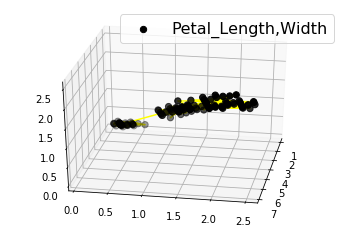

In [149]:
mpl.rcParams['legend.fontsize'] = 16
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
ax.scatter(X,Y, yp, label="Petal_Length,Width",s = 40, color="black") 
ax.legend() 
ax.plot(X,Y,yp,color="yellow")
ax.view_init(30, 10) 
plt.show() 

# Multiple Linear Regression

In [104]:
x=[data.iloc[:,:2],data.iloc[:,3]]
y=data.iloc[:,4]

In [159]:
def Multiple_Regression(x,y):
    aug_D=pd.concat(x,axis=1)
    scatter_matrix=np.dot(np.transpose(aug_D),aug_D)
    inverse_sc_m=np.linalg.inv(scatter_matrix)
    dty=np.dot(np.transpose(aug_D),y)
    w=np.dot(inverse_sc_m,dty)
    ypr=[]
    for k in range(data.shape[0]):
        ypr.append(w[0]+np.dot(w[1],aug_D.iloc[k,1])+np.dot(w[2],aug_D.iloc[k,2]))
    return ypr
res=Multiple_Regression(x,y)

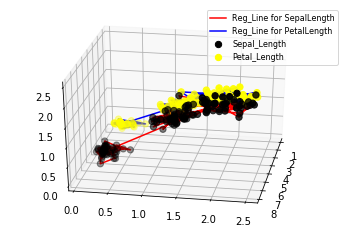

In [168]:
mpl.rcParams['legend.fontsize'] = 8
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
ax.scatter(data.iloc[:,1],data.iloc[:,4], res,label="Sepal_Length",s = 40, color="black") 
ax.plot(data.iloc[:,1],data.iloc[:,4],res,color="red",label="Reg_Line for SepalLength")
ax.scatter(data.iloc[:,3],data.iloc[:,4], res,label="Petal_Length",s = 40, color="yellow") 
ax.plot(data.iloc[:,3],data.iloc[:,4],res,color="blue",label="Reg_Line for PetalLength")
ax.view_init(30, 10) 
ax.legend()
plt.show() 

In [199]:
import plotly.express as px 
za=pd.concat([data.iloc[:,1],data.iloc[:,4],pd.DataFrame(res,columns=["linearReg"])],axis=1)
fig = px.line_3d(za,x="Sepal_Length",y="Petal_Width",z="linearReg") 
fig.show()

# Multiple Linear Regression using SGD

In [354]:
def SGD(x,y,eta,err):
    aug_d=pd.concat(x,axis=1)
    t=0
    wt0=np.random.randn(aug_d.shape[1] ,)
    wt1 = np.random.randn(aug_d.shape[1] ,)
    err=0.0001
    eta=0.001
    loss=[]
    ls = 0.00001
    while(0.00001 <= err):
        for k in range(data.shape[0]):
            dw_xk=-(np.dot(np.subtract(data.iloc[k,4],(np.dot(np.transpose(aug_d.iloc[k,:]),wt0))),aug_d.iloc[k,:]))
            wt1=wt0-eta*(dw_xk)
        t=t+1
        ls = np.sum(np.power(wt0-wt1,1))
        loss.append(ls)
        wt0=wt1
        if t>100:
            break
    return wt0,loss

In [355]:
(weigth_vector,loss)=SGD(x,y,0.001,0.0001)

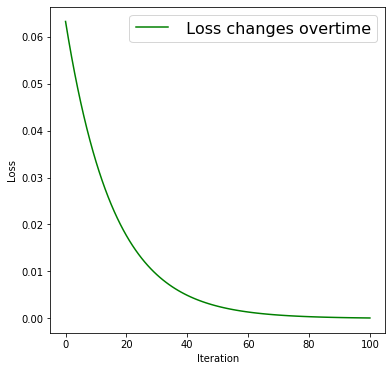

In [356]:
plt.figure(figsize=(6,6))
plt.plot(np.array(range(101)),loss,color='green',label=' Loss changes overtime')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()